<a href="https://colab.research.google.com/github/DeeptransfrAI/Deep_Learning_Projects/blob/master/Mask_RCNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An editted version of the demo notebook in https://github.com/matterport/Mask_RCNN

# Install libraries

In [0]:
!pip install imgaug
!pip install Cython
!pip install pycocotools
!pip install kaggle

# Clone Repo

In [14]:
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [0]:
import os 
os.chdir('Mask_RCNN/samples')

# Set Up Configs to Prepare Model

In [16]:
#set up configuratios for model preparation

import sys
import random
import math
import numpy as np
import skimage.io

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "downloads")

... done downloading pretrained model!


# Draw Image, Create Inference Object & Make Predictions

Saving zebras.jpg to zebras.jpg


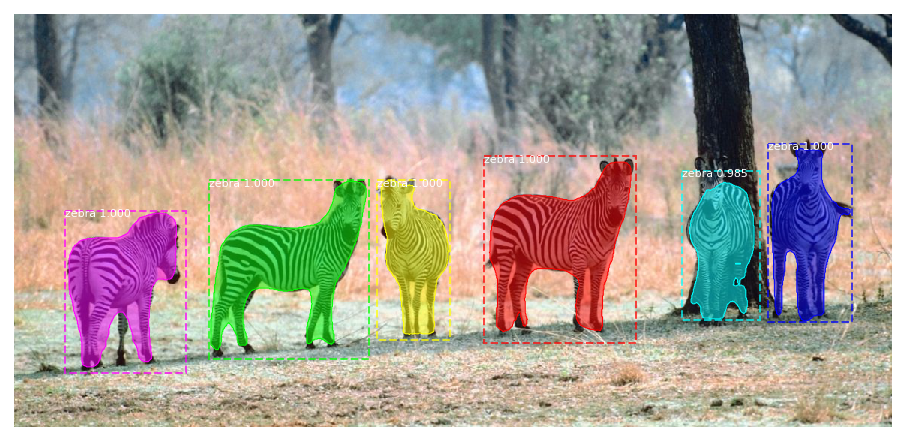

In [27]:
import io
from io import BytesIO
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import coco 
from mrcnn.visualize import display_instances
from mrcnn.config import Config

class_names = ['BG', 'person', 'bicyle', 'car', 'motorcycle',
               'airplane', 'bus', 'train', 'truck', 'boat',
               'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 
              'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 
              'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 
               'suitcase', 'frisbee', 'skees', 'snowboard', 'sports ball', 'kite',
               'basball hat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
               'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwhich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 
               'cake', 'chair', 'couch', 'plotted plant', 'bed','dining table', 'toilet', 'tv',
               'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
               'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
               'teady bear', 'hair dryer', 'toothbrush']

#create inference object
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    NAME = 'test'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

config = InferenceConfig()

#define model (create model as Inference model) --> only want to make predictions...no training involved
rcnn = modellib.MaskRCNN(mode= 'inference', model_dir = MODEL_DIR, config = config)

#load coco weights from local directory
rcnn.load_weights(COCO_MODEL_PATH, by_name = True)

#load image
uploaded = files.upload()
img = load_img(io.BytesIO(uploaded['zebras.jpg']))
img = img_to_array(img)

#run detection
results = rcnn.detect([img], verbose = 0)
r = results[0]
#show photo with bounding box, mask, scores, class labels 
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])